<a href="https://colab.research.google.com/github/kharadevaibhav/Data-Analytics-Tasks/blob/main/Prediction_on_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/Data analytics/updated_pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [4]:
#Step 1: Inspect Data
print("First 5 Rows:\n", df.head())
print("\nData Info:\n")
df.info()
print("\nSummary Stats:\n", df.describe())

First 5 Rows:
    Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         ------------

In [5]:
#Step 2: Data Cleaning
nulls = df.isnull().sum()
null_percentage = (nulls / len(df)) * 100
print("\nNull Percentage:\n", pd.concat([nulls, null_percentage], axis=1).rename(columns={0: 'Null Count', 1: 'Null %'}))



Null Percentage:
                                Null Count  Null %
Temperature                             0     0.0
Humidity                                0     0.0
PM2.5                                   0     0.0
PM10                                    0     0.0
NO2                                     0     0.0
SO2                                     0     0.0
CO                                      0     0.0
Proximity_to_Industrial_Areas           0     0.0
Population_Density                      0     0.0
Air Quality                             0     0.0


In [6]:
#Step 3: Subplots (industrial area vs non-industrial area)
df['Zone Type'] = df['Proximity_to_Industrial_Areas'].apply(lambda x: 'industrial area' if x < 5 else 'non-industrial area')

<ipython-input-7-2d98b4075d74>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pm25.index, y=avg_pm25.values, ax=axes[0], palette='Set2')
<ipython-input-7-2d98b4075d74>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zone Type', y='NO2', data=df, ax=axes[1], palette='Pastel1')


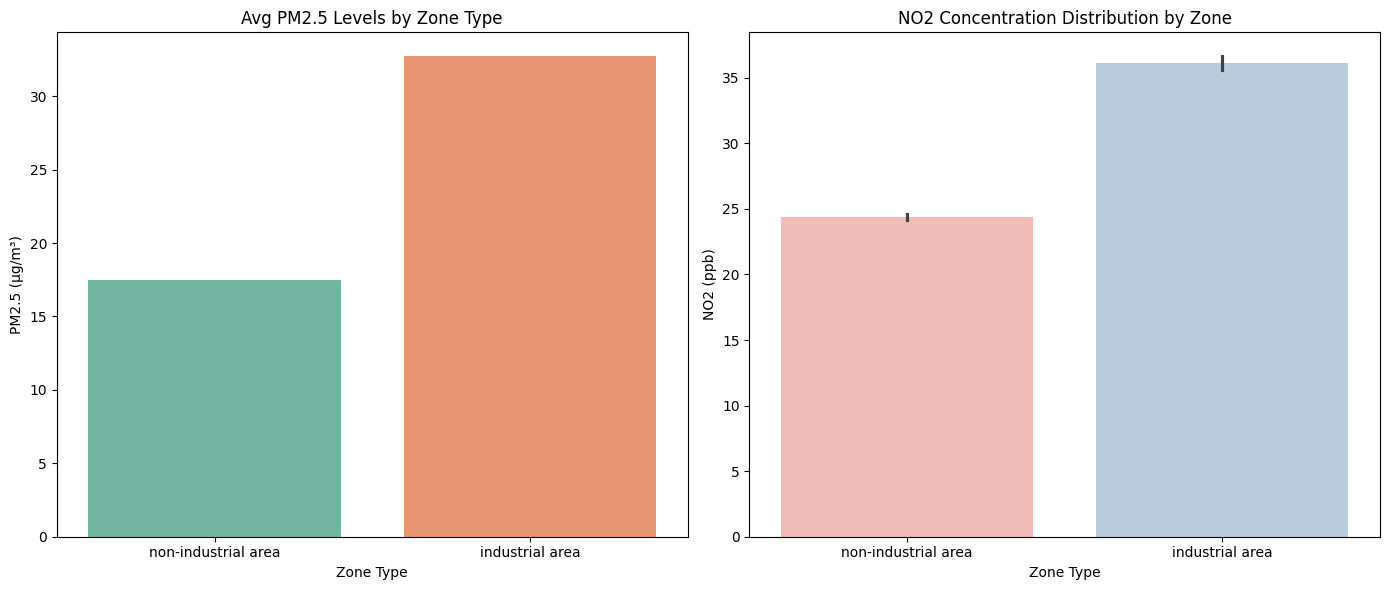

In [7]:
# Create new figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar Plot: Average PM2.5 in industrial area vs non-industrial area
avg_pm25 = df.groupby('Zone Type')['PM2.5'].mean().sort_values()
sns.barplot(x=avg_pm25.index, y=avg_pm25.values, ax=axes[0], palette='Set2')
axes[0].set_title('Avg PM2.5 Levels by Zone Type')
axes[0].set_ylabel('PM2.5 (µg/m³)')
axes[0].set_xlabel('Zone Type')

# Violin Plot: NO2 Concentration Distribution
sns.barplot(x='Zone Type', y='NO2', data=df, ax=axes[1], palette='Pastel1')
axes[1].set_title('NO2 Concentration Distribution by Zone')
axes[1].set_ylabel('NO2 (ppb)')
axes[1].set_xlabel('Zone Type')

plt.tight_layout()
plt.show()

<ipython-input-8-137ada0b700a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pop_density_by_zone.index, y=pop_density_by_zone.values, palette='coolwarm')


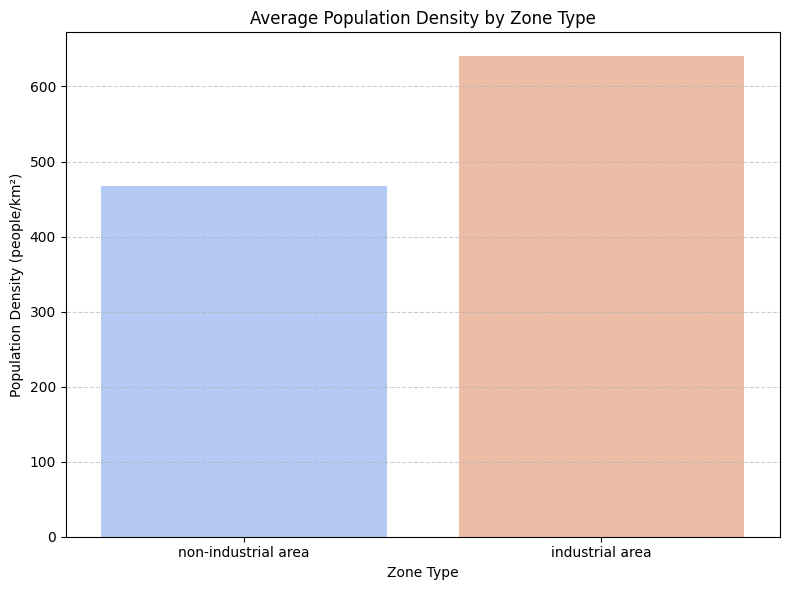

In [8]:
# Calculate average population density
pop_density_by_zone = df.groupby('Zone Type')['Population_Density'].mean().sort_values()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=pop_density_by_zone.index, y=pop_density_by_zone.values, palette='coolwarm')
plt.title('Average Population Density by Zone Type')
plt.ylabel('Population Density (people/km²)')
plt.xlabel('Zone Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<ipython-input-9-5a264a479b9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zone Type', y='Temperature', data=df, palette='YlGnBu')


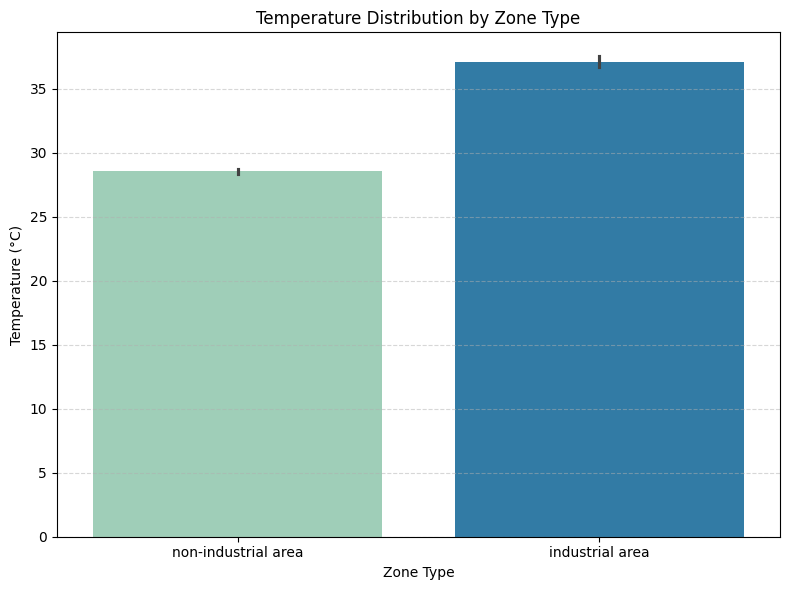

In [9]:

# barplot plot: Distribution of temperature
plt.figure(figsize=(8, 6))
sns.barplot(x='Zone Type', y='Temperature', data=df, palette='YlGnBu')
plt.title('Temperature Distribution by Zone Type')
plt.ylabel('Temperature (°C)')
plt.xlabel('Zone Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

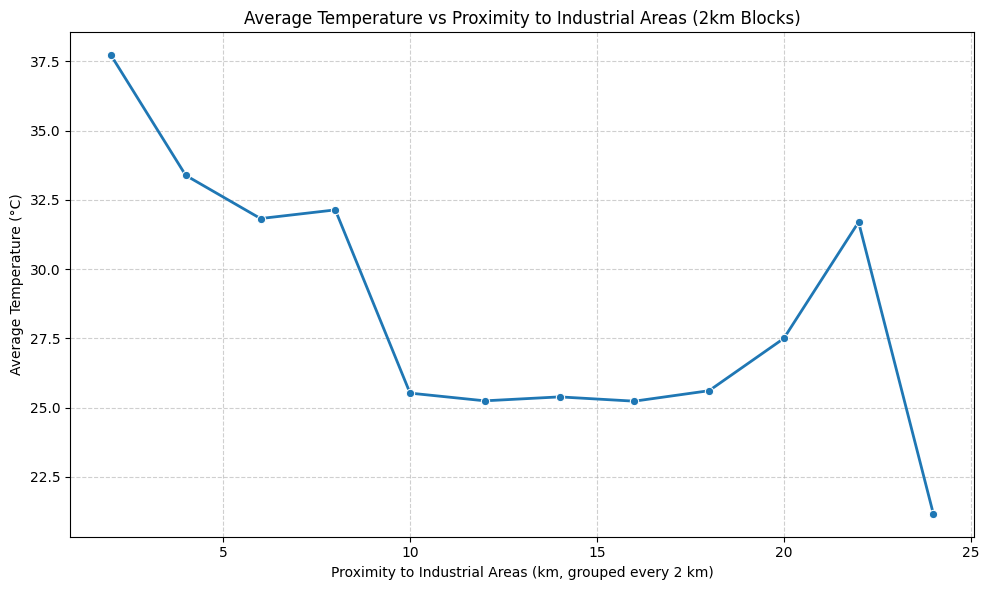

In [10]:
# Create 2 km blocks
df['Proximity Block (2km)'] = (df['Proximity_to_Industrial_Areas'] // 2) * 2

# Group by these blocks and calculate average temperature
avg_temp_by_block = df.groupby('Proximity Block (2km)')['Temperature'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Proximity Block (2km)', y='Temperature', data=avg_temp_by_block, marker='o', linewidth=2)
plt.title('Average Temperature vs Proximity to Industrial Areas (2km Blocks)')
plt.xlabel('Proximity to Industrial Areas (km, grouped every 2 km)')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

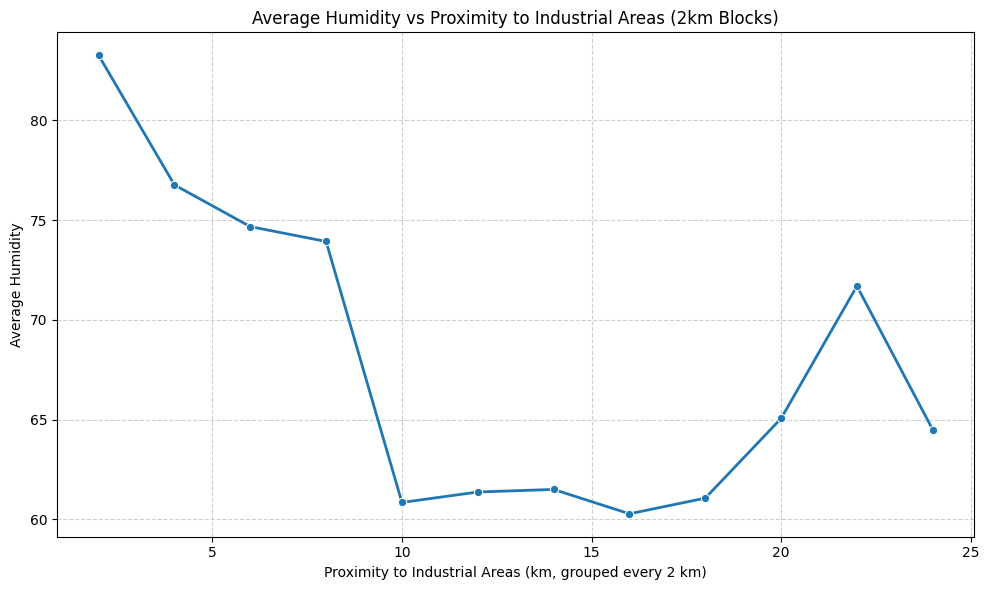

In [11]:

# Group by these blocks and calculate average temperature
avg_temp_by_block = df.groupby('Proximity Block (2km)')['Humidity'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Proximity Block (2km)', y='Humidity', data=avg_temp_by_block, marker='o', linewidth=2)
plt.title('Average Humidity vs Proximity to Industrial Areas (2km Blocks)')
plt.xlabel('Proximity to Industrial Areas (km, grouped every 2 km)')
plt.ylabel('Average Humidity')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

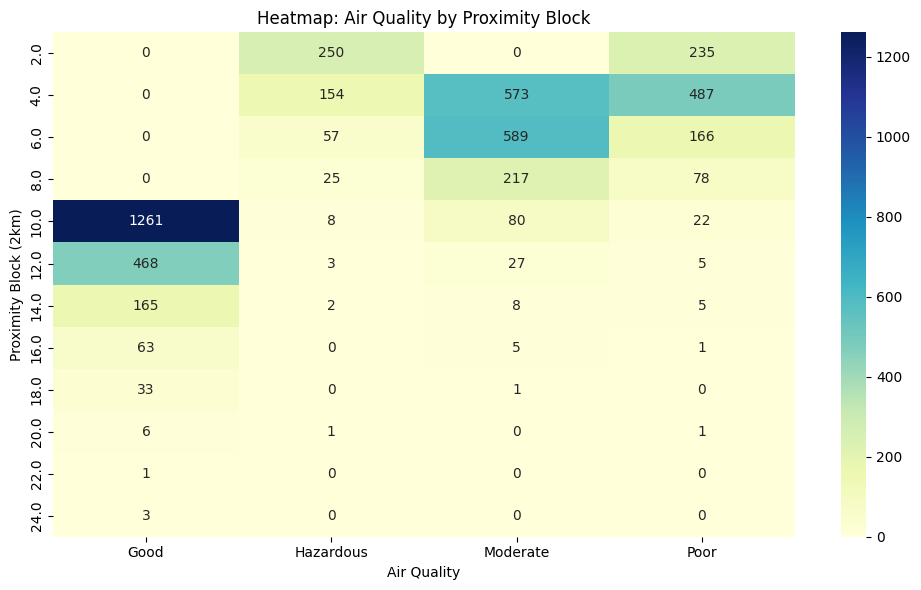

In [12]:
# Create a cross-tab
crosstab = pd.crosstab(df['Proximity Block (2km)'], df['Air Quality'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap: Air Quality by Proximity Block')
plt.xlabel('Air Quality')
plt.ylabel('Proximity Block (2km)')
plt.tight_layout()
plt.show()

In [13]:
print("\nOutcome Suggestions:")
print("""
1. Generally, as we move away from industrial areas, both temperature and humidity tend to decrease with increasing distance.
2. Generally, the air quality tends to be good at distances greater than 10 km from industrial areas.
3. Compared to non-industrial zones, industrial zones have the highest population.
4. The average fine particulate matter (PM2.5) levels in non-industrial zones range between 15 to 20 µg/m³,
   whereas in industrial zones, they are typically above 30 µg/m³.
""")


Outcome Suggestions:

1. Generally, as we move away from industrial areas, both temperature and humidity tend to decrease with increasing distance.
2. Generally, the air quality tends to be good at distances greater than 10 km from industrial areas.
3. Compared to non-industrial zones, industrial zones have the highest population.
4. The average fine particulate matter (PM2.5) levels in non-industrial zones range between 15 to 20 µg/m³,
   whereas in industrial zones, they are typically above 30 µg/m³.

